In [97]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import datetime as dt
import glob

In [98]:
def leer_precios(filename):
    for k in range(10):
        df = pd.read_excel(filename,skiprows = k, usecols = list(range(25)))
        if df.iloc[0,0] == "Fecha":
            j = k + 1
            df2 = pd.read_excel(filename, skiprows = j, usecols = list(range(25)))
        else:
            df2 = pd.read_excel(filename,skiprows = k, usecols = list(range(25)))
            if df2.columns[0] == "Fecha":
                break
    df2 = df2[df2['Fecha'].isna()==False]
    return(df2)

filenames = !ls precios/*.xls*
filenames

['precios/Precio_Bolsa_Nacional_($kwh)_1995.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_1996.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_1997.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_1998.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_1999.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2000.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2001.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2002.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2003.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2004.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2005.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2006.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2007.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2008.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2009.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2010.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2011.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2012.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2013.xlsx',
 'precios/Precio_Bolsa_Nacional

In [99]:
dfs = []
for filename in filenames:
    dfs.append(leer_precios(filename))
dfs= pd.concat(dfs, sort=True)
dfs.size

210000

In [100]:
##Punto 01 - Organizando la información
dfs1 = pd.melt(dfs,id_vars="Fecha")
dfs1.columns = ['Fecha','Hora','Precio']

In [101]:
dfs1

,Fecha,Hora,Precio
0,1995-07-20,0,NaN
1,1995-07-21,0,1.073000
2,1995-07-22,0,1.073000
3,1995-07-23,0,1.073000
4,1995-07-24,0,1.000000
5,1995-07-25,0,0.990000
6,1995-07-26,0,0.500000
7,1995-07-27,0,0.500000
8,1995-07-28,0,0.000000
9,1995-07-29,0,1.000000


In [102]:
## Verifico que me salgan todas las fechas
##dfs2 = dfs1[dfs1["Hora"]=="0"]
##dfs2
## Convertir las variables al formato que me interesa
dfs1["Precio"] = pd.to_numeric(dfs1["Precio"])
dfs1["Fecha"] = pd.to_datetime(dfs1["Fecha"])
dfs1["Hora"] = pd.to_numeric(dfs1["Hora"])
dfs1.dtypes

Fecha     datetime64[ns]
Hora               int64
Precio           float64
dtype: object

In [104]:
## Punto 02 - Número de registros con datos faltantes
dfs1.isnull().sum().sum()

22

In [105]:
## Punto 03 - Número de registros con duplicados
dfs1.duplicated().sum()

1759

In [106]:
## Punto 04 - Elminar los registros duplicados
len(dfs1) - dfs1.duplicated().sum() - dfs1.isnull().sum().sum()

199819

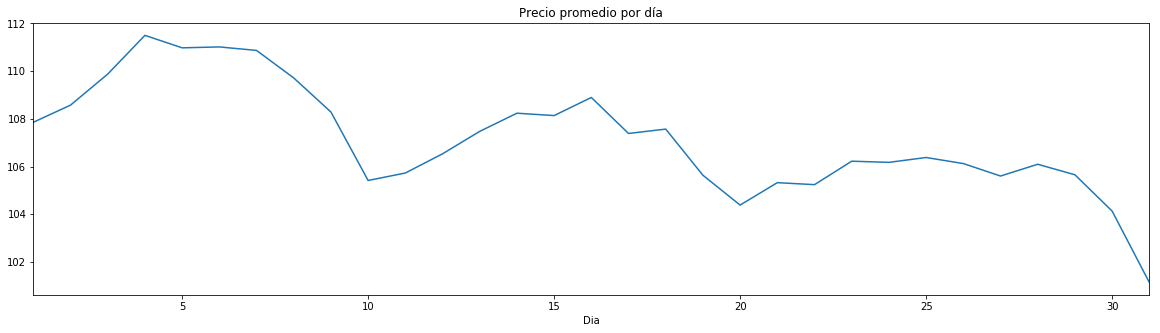

In [107]:
## Punto 05- Precio promedio por día
## Creo la tabla de Prom_precio_dia
dfs1["Dia"] = dfs1["Fecha"].dt.day
Prom_precio_dia = (dfs1.groupby("Dia")["Precio"].mean())
## Realizo el grafico
Prom_precio_dia.plot(title="Precio promedio por día");

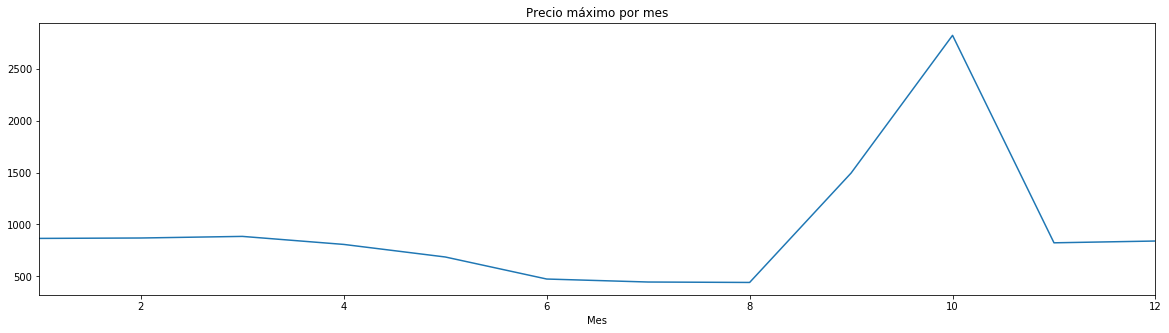

In [108]:
## Punto 06 - Precio máximo por mes
## Creo la tabla de Max_precio_mes
dfs1["Mes"] = dfs1["Fecha"].dt.month
Max_precio_mes = (dfs1.groupby("Mes")["Precio"].max())
## Realizo el grafico
Max_precio_mes.plot(title="Precio máximo por mes");

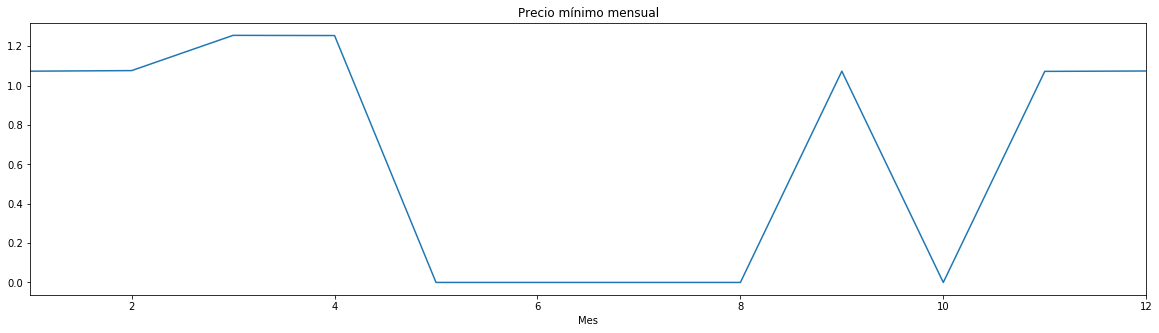

In [109]:
## Punto 07 - Precios mínimos por mes
## Creo la tabla de Min_precio_mes
##dfs1["Mes"] = dfs1["Fecha"].dt.month
Min_precio_mes = (dfs1.groupby("Mes")["Precio"].min())
## Realizo el grafico
Min_precio_mes.plot(title="Precio mínimo mensual");

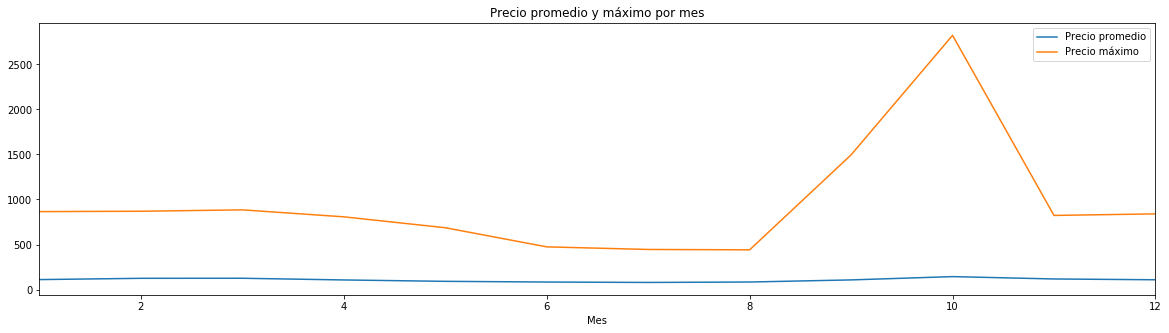

In [110]:
## Punto 08 - Precio promedio y máximo por mes
d = {"Precio": ['mean', 'max']}
d1 = dfs1.groupby("Mes").agg(d)
d2 = d1.plot(title="Precio promedio y máximo por mes")
d2.legend(["Precio promedio", "Precio máximo"]);

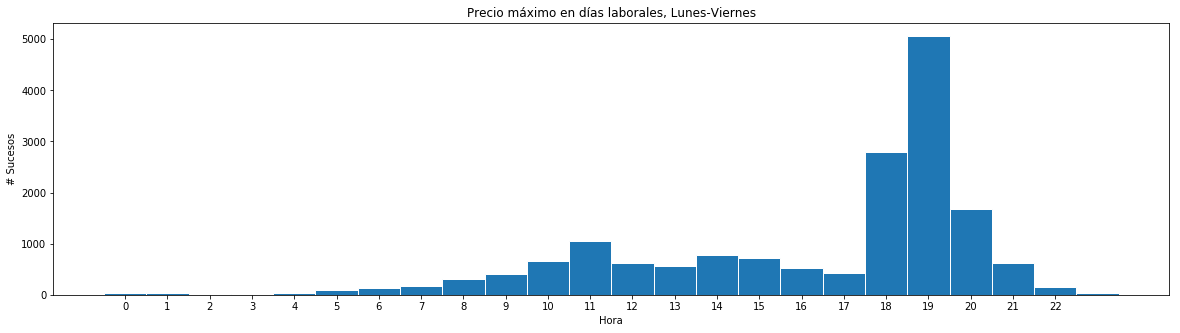

In [111]:
## Punto 09 - Histograma con precio máximo para los días laborales
# Creamos una columna con el nombre del día
dfs1["nombre dia"] = dfs1["Fecha"].dt.weekday_name
# Seleccionamos las columnas de interés
punto9 = dfs1[['Fecha','nombre dia','Hora','Precio']]
# Filtramos omitiendo los días no laborales
solucion9 = punto9[(punto9['nombre dia']!='Saturday') & 
           (punto9['nombre dia']!='Sunday')]
# Agrupamos por el nombre día para hallar el precio máximo por hora
solucion9_aux = solucion9[solucion9['Precio'] == solucion9.groupby('Fecha')['Precio'].transform('max')]

plt.hist(solucion9_aux['Hora'], bins = 24, range = (0,24), edgecolor = 'w', align = 'left')

plt.xticks(range(23))
plt.xlabel('Hora') 
plt.ylabel('# Sucesos')
plt.title('Precio máximo en días laborales, Lunes-Viernes')
plt.rcParams['figure.figsize'] = [20,5];

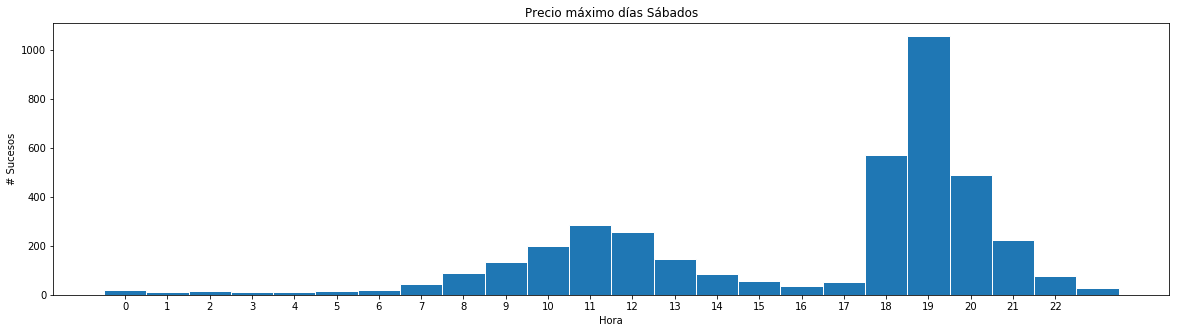

In [112]:
## Punto 10 - Histograma con precio máximo para los días Sábados
# Usamos archivos creados en punto anterior
solucion10 = punto9[(punto9['nombre dia']=='Saturday')]
# Agrupamos por el nombre día para hallar el precio máximo por hora
solucion10_aux = solucion10[solucion10['Precio'] == solucion10.groupby('Fecha')['Precio'].transform('max')]

plt.hist(solucion10_aux['Hora'], bins = 24, range = (0,24), edgecolor = 'w', align = 'left')

plt.xticks(range(23))
plt.xlabel('Hora') 
plt.ylabel('# Sucesos')
plt.title('Precio máximo días Sábados')
plt.rcParams['figure.figsize'] = [20,5];

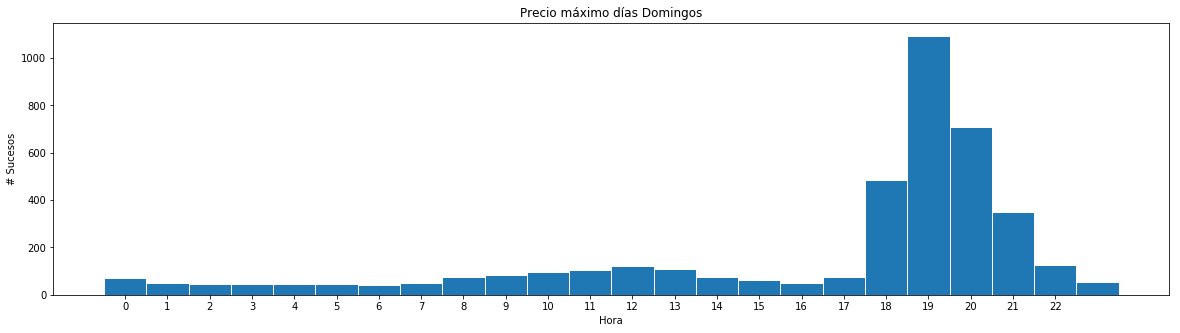

In [113]:
## Punto 11 - Histograma con precio máximo para los días Domingos
# Usamos archivos creados en punto 9
solucion11 = punto9[(punto9['nombre dia']=='Sunday')]
# Agrupamos por el nombre día para hallar el precio máximo por hora
solucion11_aux = solucion11[solucion11['Precio'] == solucion11.groupby('Fecha')['Precio'].transform('max')]

plt.hist(solucion11_aux['Hora'], bins = 24, range = (0,24), edgecolor = 'w', align = 'left')

plt.xticks(range(23))
plt.xlabel('Hora') 
plt.ylabel('# Sucesos')
plt.title('Precio máximo días Domingos')
plt.rcParams['figure.figsize'] = [20,5];

In [114]:
## Punto 11 - Tabla con Fecha y precio mínimo por Año
# Creamos una variable de año
punto11 = punto9[:]
punto11['Anio'] = punto11['Fecha'].dt.year

# Agrupamos por el nombre día para hallar el precio máximo por hora
solucion11_aux = punto11[(punto11['Precio'] != 0)]
solucion11 = solucion11_aux[solucion11_aux['Precio'] == solucion11_aux.groupby('Anio')['Precio'].transform('min')]
solucion11_final = solucion11.sort_values('Precio',ascending = False).groupby('Anio').head(1)
solucion11_final = solucion11_final[['Fecha','Precio','Anio']]
solucion11_final

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Fecha,Precio,Anio
151170,2018-04-06,61.457224,2018
125487,2016-12-09,61.100689,2016
49996,2017-03-28,60.312095,2017
107984,2015-01-06,46.791501,2015
14857,2013-01-09,40.415346,2013
107624,2014-01-11,38.941951,2014
2809,2003-02-14,37.013438,2003
174202,2012-04-29,34.988099,2012
5874,2011-06-06,33.291100,2011
5326,2009-12-22,32.892503,2009


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


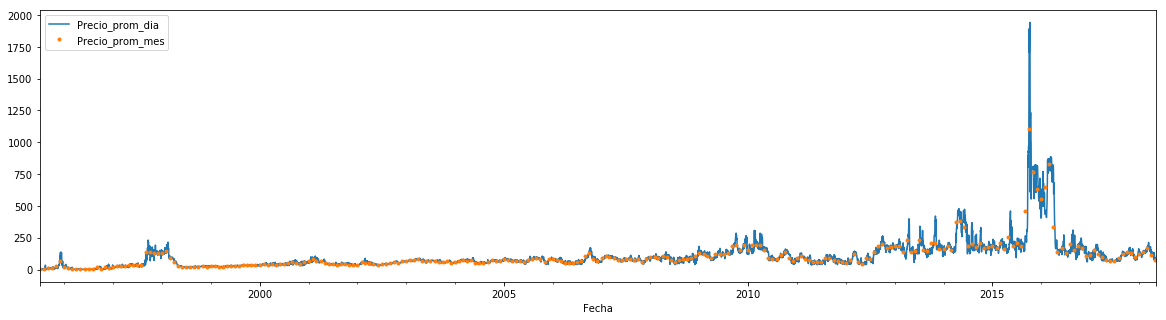

In [115]:
# Punto 13 - Gráfica que muestre el precio promedio diario y el precio promedio mensual.

punto12 = punto9[:]
#punto12['Mes'] = punto12['Fecha'].dt.month
#punto12['Dia'] = punto12['Fecha'].dt.day
punto12['Precio_prom_dia'] = punto12['Precio']
punto12['Precio_prom_mes'] = punto12['Precio']
punto12.groupby([punto12['Fecha'].dt.to_period('D')])['Precio_prom_dia'].mean().plot(style ='-', legend = 'Precio promedio dia')
punto12.groupby([punto12['Fecha'].dt.to_period('M')])['Precio_prom_mes'].mean().plot(style ='.', legend = 'Precio promedio mes')